In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\Shridatta\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df_train=pd.read_csv('C:\\Users\\Shridatta\\Desktop\\Fake-News-Classifier-master_1\\train.csv')

In [3]:
df_test=pd.read_csv('C:\\Users\\Shridatta\\Desktop\\Fake-News-Classifier-master_1\\test.csv')

In [4]:
df_train.shape

(20800, 5)

In [5]:
df_test.shape

(5200, 4)

In [6]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
df_train.label.unique()

array([1, 0], dtype=int64)

In [10]:
df_train.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
df_train.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [12]:
train=df_train.copy()

In [13]:
train=train.dropna()

In [14]:
train.shape

(18285, 5)

In [15]:
X=train.drop('label',axis=1)

In [16]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [17]:
y=train['label']

In [18]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [19]:
train.reset_index(inplace=True)

In [20]:
train.title[5]

'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart'

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk
import re
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shridatta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shridatta\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wn=WordNetLemmatizer()
corpus=[]

for i in range(0, len(train)):
    review = re.sub('[^a-zA-Z]', ' ', str(train.title[i]))
    review = review.lower()
    review = review.split()
    
    review=[wn.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [23]:
corpus[:5]

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery']

In [24]:
cv=CountVectorizer(max_features=5000, ngram_range=(1, 3))
X=cv.fit_transform(corpus).toarray()

In [25]:
X.shape

(18285, 5000)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [27]:
cv.get_feature_names()[:20]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'academy',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protest']

In [28]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [29]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())
count_df.head()

,abandon,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**MultinomialNB**

In [31]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
classifier=MultinomialNB()

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.898
Confusion matrix, without normalization


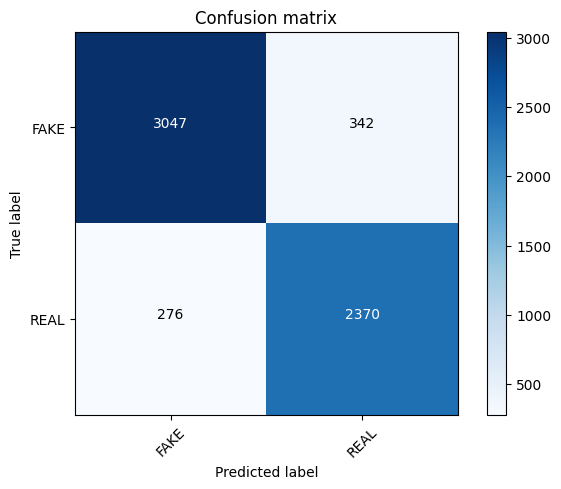

In [32]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [33]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8975973487986744

**Passive Aggressive Classifier Algorithm**

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.916
Confusion matrix, without normalization


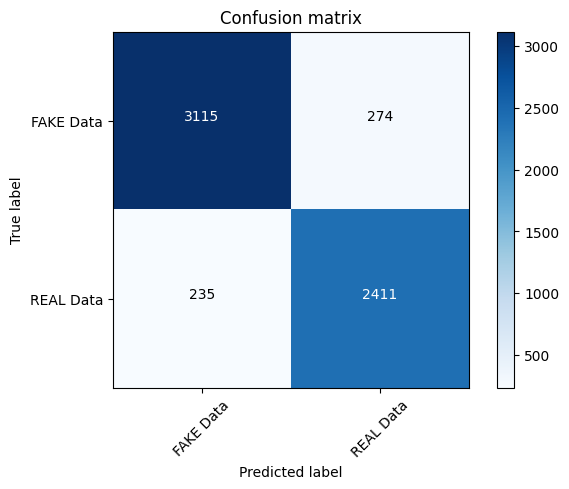

In [35]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

**MultinomialNB Hyperparameter tunning**

In [36]:
classifier=MultinomialNB(alpha=0.1)

In [37]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.8853355426677714
Alpha: 0.1, Score : 0.8979287489643745
Alpha: 0.2, Score : 0.8977630488815245
Alpha: 0.30000000000000004, Score : 0.8982601491300746
Alpha: 0.4, Score : 0.8980944490472246
Alpha: 0.5, Score : 0.8990886495443248
Alpha: 0.6000000000000001, Score : 0.8992543496271748
Alpha: 0.7000000000000001, Score : 0.899751449875725
Alpha: 0.8, Score : 0.8989229494614748
Alpha: 0.9, Score : 0.8979287489643745


In [38]:
feature_names = cv.get_feature_names()

In [39]:
classifier.feature_log_prob_[0]

array([ -9.54144715,  -9.7271643 ,  -9.02386474, ...,  -9.38487809,
       -11.42176002,  -9.38487809])

In [40]:
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(-2.9101602174697323, 'new'),
 (-2.957522319591206, 'time'),
 (-2.963868711708189, 'york'),
 (-2.9641045385180735, 'new york'),
 (-2.978117688212791, 'york time'),
 (-2.978117688212791, 'new york time'),
 (-3.928752145582087, 'breitbart'),
 (-3.9678763227676006, 'trump'),
 (-5.238986642315942, 'donald'),
 (-5.245892747112354, 'donald trump'),
 (-5.783405347884369, 'say'),
 (-5.96501541407556, 'obama'),
 (-5.979342306696322, 'clinton'),
 (-6.085825787098772, 'state'),
 (-6.20501430436389, 'president'),
 (-6.241850881720381, 'house'),
 (-6.2481244280176185, 'briefing'),
 (-6.2800964607154555, 'hillary'),
 (-6.293177091958562, 'attack'),
 (-6.368349082655654, 'report')]

In [41]:
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:5000]

[(-11.421760017218116, 'access pipeline protest'),
 (-11.421760017218116, 'acknowledge emf'),
 (-11.421760017218116, 'acknowledge emf damage'),
 (-11.421760017218116, 'acquitted'),
 (-11.421760017218116, 'adhd'),
 (-11.421760017218116, 'al nusra'),
 (-11.421760017218116, 'america last'),
 (-11.421760017218116, 'america vote'),
 (-11.421760017218116, 'american concerned'),
 (-11.421760017218116, 'american concerned election'),
 (-11.421760017218116, 'american people defeat'),
 (-11.421760017218116, 'auf'),
 (-11.421760017218116, 'available'),
 (-11.421760017218116, 'baby powder'),
 (-11.421760017218116, 'bad news'),
 (-11.421760017218116, 'badge'),
 (-11.421760017218116, 'ballot'),
 (-11.421760017218116, 'banana'),
 (-11.421760017218116, 'banana republic'),
 (-11.421760017218116, 'banking'),
 (-11.421760017218116, 'behind trump'),
 (-11.421760017218116, 'biased'),
 (-11.421760017218116, 'big pharma'),
 (-11.421760017218116, 'bishop'),
 (-11.421760017218116, 'black agenda'),
 (-11.421760

**Tf-Idf**

In [42]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [43]:
y=train['label']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [45]:
tfidf_v.get_feature_names()[:20]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'academy',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protest']

In [46]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [47]:
count_tf_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [48]:
count_tf_df.head()

,abandon,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


accuracy:   0.881
Confusion matrix, without normalization


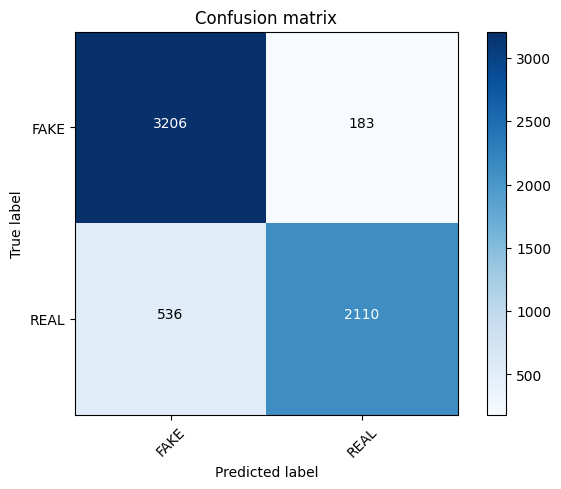

In [49]:
classifiers=MultinomialNB()
classifiers.fit(X_train, y_train)
preds = classifiers.predict(X_test)
score = metrics.accuracy_score(y_test, preds)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [50]:
classifiers.fit(X_train, y_train)
preds = classifiers.predict(X_test)
score = metrics.accuracy_score(y_test, preds)
score

0.8808616404308203

In [56]:
test=df_test.copy()

In [57]:
test.reset_index(inplace=True)

In [58]:
msg=test.title

In [59]:
corpus_test=[]

for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', str(msg[i]))
    review = review.lower()
    review = review.split()
    
    review=[wn.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus_test.append(review)
    

In [60]:
cv1=CountVectorizer(max_features=5000, ngram_range=(1, 3))
X_te=cv.fit_transform(corpus_test).toarray()

In [61]:
predi = classifier2.predict(X_te)

In [62]:
predi[:50]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0], dtype=int64)

In [63]:
preds = classifiers.predict(X_te)

In [64]:
preds[:50]

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1], dtype=int64)